---
title: "Project Solar-Searcher"
authors: 
  - name: Omar Armbruster  
  - name: Andrew Dean
  - name: Col McDermott
  - name: Noah Price
date: "05-19-2025"
image: "./images/solar-searcher.png"
description: "Identifying the optimal locations for solar energy system development in the continental US"
format: html
bibliography: refs.bib
code-fold: true
execute:
  warning: false
  message: false
---

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

# 1. Abstract
As the severity of climate change continues to increase and the consumption of energy in the US remains massive, a critical focus of today’s power industry is establishing sources of renewable energy to replace less climate-friendly alternatives.  Focusing on solar energy systems, we aim to address the problem of locating optimal regions throughout the US to build solar farms for cleaner energy production.  Our general approach to this problem is to determine the predicted energy output of installing a solar system at a given coordinate location in the continental US.  Leveraging several machine learning techniques to assist our success, we chose to frame this problem as a standard regression task performed by a predictive model.  For training and informing the design of our predictive models, we collected, cleaned, and combined location-specific data from several sources on weather, elevation, and solar statistics throughout the continental US.  Our modeling approach involves the use of a custom neural network and experimentation with different network layers and nonlinear activation functions.  In addition to constructing our custom models, we fit and evaluated a standard linear regression model from the `sklearn` library to compare predictive performance across several model architectures (performance assessed via Mean-Squared-Error loss minimization).  From our model tuning and comparison procedures, we found that a linear regression model using the ReLU activation function offers the most accurate solar energy predictions.  To visualize and interpret our findings, we developed an interactive map of the continental US, displaying predicted solar energy output (in **kWh/kWp** $-$ kilowatt-hour per kilowatt-peak) at a resolution of approximately $4$ km$^2$.  We intend for our potential solar energy map to stand as a practical tool for guiding future solar power system development and planning.

The entirety of our work is accessible in the following public repository: [Solar-Searcher](https://github.com/andrewdean1/solar-searcher)

# 2. Introduction
### 2.1 Motivation
As acknowledged above, climate change and global warming continue to rapidly intensify, driving adversity towards billions of people and countless species of wildlife across the planet.  In a 2023 report from the World Health Organization, it was conservatively projected that climate change will cause an additional $250,000$ annual deaths by 2030 [@who2023].  Along similar and possibly more severe lines, the World Wide Fund for Nature reports a “catastrophic $73\%$ decline in the average size of monitored wildlife populations” over the past 50 years [@wwf2024].  Perhaps the most significant threat posed by climate change and global warming is the irreparable and irreversible alteration of the planet’s biosphere.  Some experts even fear that the “point of no return” has already been passed.  Yet, despite the daunting effects and implications of the current climate circumstances, it remains crucial to direct worldwide attention, technology, and resources towards establishing climate-conscious societies.  It is widely recognized that some of the largest contributors to the current climate crisis are carbon-intensive, non-renewable energy production systems.  Consequently, large actors of the global power industry, including governmental bodies and officials throughout many nations, are drawing their attention toward the development of planet-supporting energy solutions.  Such solutions involve the replacement of preexisting, harmful energy systems with renewable alternatives.  Simply put, establishing renewable and regenerative energy sources is an irrefutably necessary step in combating global warming.

Three of the most common avenues for renewable energy systems are in solar-, hydro-, and wind-powered generators.  While these clean-energy sources are proven to be not only highly effective but also regenerative (or supporting of regeneration), they often require a complex set of specific circumstances for construction.  Significant renewable energy system limitations include geographical/topological elements and the consistency of weather conditions of a given power production location.  To function at peak capacity and comparably to traditional, environmentally abrasive methods, developers aim to install renewable energy systems in regions with the optimal set of conditions.  Consequently, the task of identifying these optimal installation locations becomes a primary concern of renewable energy development.  As one of the most abundant sources of renewable energy in the continental US, we direct our attention in this study to the development of solar energy systems.  Specifically, we intend to address several key concerns of photovoltaic (PV) system implementation including: What factors should solar energy developers take into consideration when initiating installation projects?  Based on the relevant factors, which regions are optimal locations for PV system development?  At a given location, how can the quality of installing a solar energy system be quantified and compared to other neighboring areas?  Driven by these questions, our study offers an approach to solar energy forecasting in the continental US.

### 2.2 Related Work
Solar energy forecasting has been widely addressed with the use of machine learning tools and techniques.  Previous research in this area includes the incorporation of neural network-based models, random forest classifiers, and linear regression techniques $-$ as well as thorough collection and preprocessing procedures of meteorological data $-$ to provide informative insight for predicting solar power production.  A 2020 study focusing on solar energy production in Hawaii found a gradient-boosted regression model enhanced with a standard PCA data process to yield strong predictive results for solar power forecasting [@Munawar2020].  Similarly, a 2021 article describes another forecasting framework comparing linear and nonlinear regression models, experimenting with artificial neural network architectures, for predicting solar energy production in Morocco [@JEBLI2021120109].  Alternatively, a related 2022 study on solar energy forecasting found compelling results using a modeling approach featuring a machine learning ensemble-to-classifier pipeline operating on standard weather data [@Alzubaidi2022].  In our study, we aim to extend the previous research in this field and develop a comprehensible, accessible PV energy prediction framework oriented for the continental US.

### 2.3 Study Overview
In the sections below, we present our data collection and cleaning protocols; our model designs, neural network architecture, and model comparisons; our solar forecasting results; and an accompanying discussion addressing our progress and potential future work.  Additionally, as a preface to the technical content explored in our study, we offer a brief acknowledgement of the societal implications and impact of our work.

# 3. Values Statement

# 4. Materials and Methods
### 4.1 Data Collection
The data used in our study was gathered from a collection of publicly available sources from national and international organizations.  For solar irradiance and photovoltaic information, we collected data from the National Renewable Energy Laboratory (NREL) [@nrel2025] and the Global Solar Atlas (GSA) from The World Bank [@WorldBank2019].  For weather and elevation statistics, we pulled data from the Copernicus Climate Change Service (C3S) [@Hersbach2023] and the Google Maps API.  Outlined below are more detailed descriptions of the specific data sources used in our study:

#### <u>Photovoltaic Output (PVO)</u>
Photovoltaic output (measured in **kWh/kWp** $-$ kilowatt-hour per kilowatt-peak) is a quantitative measurement of the amount of producible energy from a solar/PV power system.  Specifically, PVO represents the amount of power generated per unit of a given solar energy installation over the long term.  Defined in kWh/kWp, PVO describes the energy output in kilowatt-hours of a single PV unit operating at peak performance (according to standard testing conditions) over a designated, long-term period of time.  In general, PVO provides a baseline metric for the energy production capacity of a given solar energy system.  We collected PVO data from The World Bank’s Global Solar Atlas [@WorldBank2019].  The PVO dataset we used contains monthly average “practical potential” PVO values from 1999-2018 for a $0.0083^\circ$-latitude by $0.0083^\circ$-longitude grid (~$1$km$^2$) of the entire US.  Each potential PVO value is calculated using a multi-step modeling process combining satellite imagery, meteorological data, and PV system simulations developed by Solargis [@solargis_solar_radiation].  For each month of the year (12 total data subsets), each row represents the potential PVO value at a given latitude-longitude coordinate location of the US.  The figure below provides a visual representation of the PVO dataset used in our study.

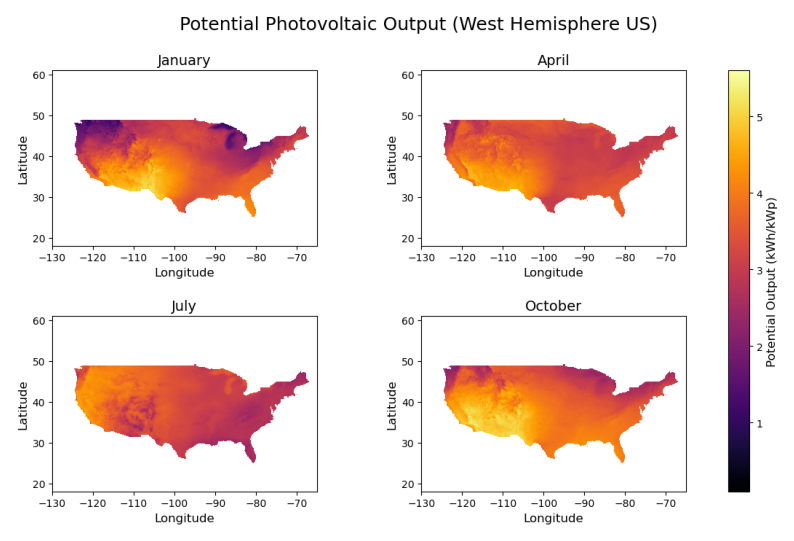

In [2]:
pvo_maps = mpimg.imread("./images/pvo_maps.png")
plt.figure(figsize = (10, 10))
plt.imshow(pvo_maps)
plt.axis("off")
plt.show()

**Figure 1: Visualizing the potential PVO data for the months of January, April, July, and October**

Relating to our primary regression objective, we use PVO as the target variable for our predictive models (see sections below for a more detailed discussion).  Considering the crucial role that the collected PVO data plays in our modeling approach, the limitations of this dataset should be addressed.  Firstly, this dataset contains monthly average values over a ~20 year span, which may disregard or underrepresent historically significant spikes and drops in PVO.  Additionally, the values in this dataset are defined in terms of a single PV unit installed at the optimal panel tilt angle.  The size of PV units and the optimal panel tilt can vary considerably from installation to installation.  Thus, it should be noted that the values in this dataset may be overgeneralizing the projected PV energy yield for certain US regions.  Further, the calculated PVO values in this data depend on numerous other relevant solar radiation and meteorological components, which may result in excessive variable correlations in the context of regression models (see sections below for further discussion on this).

#### <u>Irradiance (GHI)</u>
Solar irradiance (measured in W/m2) quantifies the instantaneous power of sunlight striking a surface. We used Global Horizontal Irradiance (GHI) – the sum of direct beam and diffuse sky radiation on a level plane – as the primary input for photovoltaic (PV) yield models, since PV output scales roughly linearly with incident irradiance (@nrel2025). Our GHI data from the U.S. Department of Energy’s National Renewable Energy Laboratory (NREL), published as the Physical Solar Model version 3 (PSM v3) from 1998-2016. This dataset contains monthly and annual GHI averages covering 0.038-degree latitude by 0.038-degree longitude (roughly 4 km by 4 km). This data was produced by merging satellite cloud-detection with radiative transfer clear-sky (REST2) and cloudy-sky (FARMS) models. Each row corresponds to one grid cell’s location, and reports its twelve monthly mean GHI values. There are some limitations to consider upon using this dataset. Firstly, values are monthly means, meaning they omit potential important peaks or lows. Next, panel tilt – finding the optimal angle to capture GHI – is not captured nor discussed by NREL. Lastly, recent climatic trends are not reflected as this data spans only up until 2016; overall weather patterns and irradiance values may have fluctuated since then.

#### <u>Weather</u>


#### <u>Elevation</u>


### 4.2 Dataset Compilation & Construction


### 4.3 Model Design


### 4.4 Model Training & Evaluation

# 5. Results
### 5.1 Model Comparison


### 5.2 Solar Forecasting Map


# 6. Discussion

# 7. Group Contribution Statement
### 7.1 Omar Armbruster


### 7.2 Andrew Dean


### 7.3 Col McDermott
Contributing to the source code, Col collected and cleaned the potential photovoltaic output data from the GSA.  He then collaborated with Andrew to merge the GHI and PVO data into a single dataset of solar information, collapsing the combined data into the overall annual average (across all $12$ months) of each feature for every coordinate data point.  Additionally, Col worked alongside Andrew and Noah to combine the solar and weather/elevation data into a single curated dataset.  Constructing the full dataset involved incorporating a `cKDTree` from the `scipy` library to merge datasets with different latitude-longitude resolutions while maintaining a sufficient number of data points and ensuring the absence of any null values.  With the full dataset established, Col created some preliminary visualizations to observe potential trends and relationships between various features.  Col also assisted with debugging the model design and improving the training scripts.  For the project report, Col wrote the abstract and introduction sections (involving research on present-day climate events and some related work in the field) as well as the brief discussion on PVO data collection.  In addition to contributing these components, Col worked on organizing and tidying the layout of the full written report.

### 7.4 Noah Price


# 8. Personal Reflection

# 9. References
::: {#refs}
:::